In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import time
import datetime

In [5]:
data=pd.read_csv('/Users/han/Desktop/Dissertation_Motified/Dissertation-CodeRevision/2016.csv')
data.rename(columns={'М1, t':'m1', 'М2, t':'m2', 'ΔМ, t':'delta_m', 'Т1, °C':'t1', 'Т2, °C':'t2', 'ΔТ, °C':'delta_t',
       'Q, Gcal':'Q',  'walls material':'walls_material', 'year of construction':'year_of_construction', 'area of building':'area_of_building',
       'temp,˚C':'temp'}, inplace=True)

In [81]:
data=pd.read_csv('D:\hanyuxuan5\Desktop\\2016.csv')
data.rename(columns={'М1, t':'m1', 'М2, t':'m2', 'ΔМ, t':'delta_m', 'Т1, °C':'t1', 'Т2, °C':'t2', 'ΔТ, °C':'delta_t',
       'Q, Gcal':'Q',  'walls material':'walls_material', 'year of construction':'year_of_construction', 'area of building':'area_of_building',
       'temp,˚C':'temp'}, inplace=True)

In [82]:
data.columns

Index(['Date', 'm1', 'm2', 'delta_m', 't1', 't2', 'delta_t', 'Q', 'USPD',
       'YYYYMM', 'registrated', 'scheme', 'type', 'area', 'floors',
       'walls_material', 'year_of_construction', 'area_of_building', 'temp'],
      dtype='object')

In [83]:
data.describe()


,m1,m2,delta_m,t1,t2,delta_t,Q,USPD,YYYYMM,type,area,floors,year_of_construction,area_of_building,temp
count,164792.000000,164792.000000,164792.000000,164792.000000,164792.000000,164792.000000,164792.000000,164792.000000,164792.000000,164792.000000,164792.000000,164792.000000,164792.000000,164792.000000,164792.000000
mean,137.630041,133.575492,4.054543,76.274687,50.367019,25.907669,3.385007,1124.833505,201605.566302,1664.243950,3476.709410,6.515419,1978.648545,7066.471478,-7.304365
std,111.781591,111.300147,7.543280,11.042464,5.812095,8.006409,2.535829,807.946417,4.239587,473.738562,2268.625664,2.305540,12.598548,6322.387367,10.247033
min,0.800000,0.010000,-25.600000,40.010000,6.380000,2.050000,0.010000,1.000000,201601.000000,1102.000000,169.400000,1.000000,1882.000000,169.400000,-32.582617
25%,75.080000,71.470000,-0.190000,66.880000,46.310000,20.310000,1.880000,457.000000,201602.000000,1105.000000,2143.700000,5.000000,1970.000000,3418.500000,-14.349412
50%,113.040000,107.590000,2.000000,74.900000,49.760000,25.470000,2.760000,999.000000,201604.000000,2005.000000,2943.700000,5.000000,1979.000000,4767.000000,-7.930418
75%,157.250000,152.680000,7.000000,85.220000,54.260000,31.590000,4.040000,1670.000000,201611.000000,2105.000000,3964.800000,9.000000,1987.000000,7943.900000,0.582159
max,1675.390000,1659.390000,514.310000,116.990000,87.510000,62.710000,28.670000,3162.000000,201612.000000,2117.000000,18801.100000,17.000000,2015.000000,32030.920000,16.963864


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164792 entries, 0 to 164791
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Date                  164792 non-null  object 
 1   m1                    164792 non-null  float64
 2   m2                    164792 non-null  float64
 3   delta_m               164792 non-null  float64
 4   t1                    164792 non-null  float64
 5   t2                    164792 non-null  float64
 6   delta_t               164792 non-null  float64
 7   Q                     164792 non-null  float64
 8   USPD                  164792 non-null  int64  
 9   YYYYMM                164792 non-null  int64  
 10  registrated           164792 non-null  object 
 11  scheme                164792 non-null  object 
 12  type                  164792 non-null  int64  
 13  area                  164792 non-null  float64
 14  floors                164792 non-null  int64  
 15  

In [85]:
data_date=data[['Date','Q']].groupby(['Date']).mean().sort_values(by='Date').reset_index()
data_date['Date']=pd.to_datetime(data_date['Date'])
data_date=data_date.sort_values(by='Date')
# data_date['Date']=data_date['Date'].dt.strftime('%Y-%m-%d')
data_date.reset_index(drop=True, inplace=True)
data_date.head(20)

,Date,Q
0,2016-01-01,4.336989
1,2016-01-02,4.431429
2,2016-01-03,4.602987
3,2016-01-04,4.614958
4,2016-01-05,4.612956
5,2016-01-06,4.684753
6,2016-01-07,4.595347
7,2016-01-08,4.569853
8,2016-01-09,4.500148
9,2016-01-10,4.571382


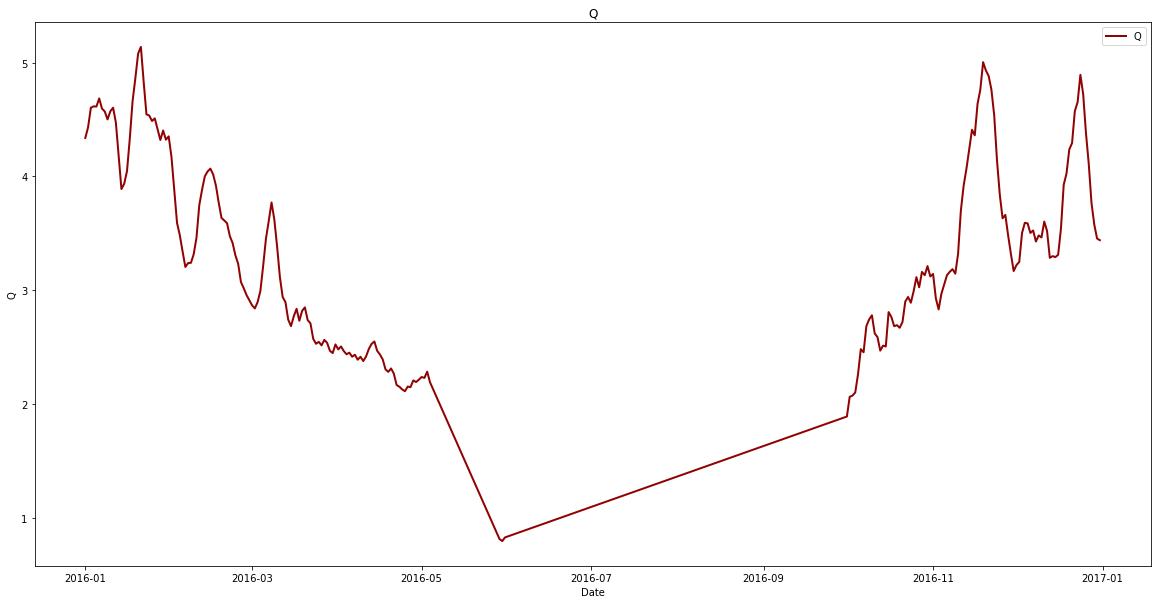

In [87]:
#画图kind='line'
plt.figure(figsize=(20,10))
#设置线粗细

plt.plot(data_date['Date'],data_date['Q'],label='Q',linewidth=2,color='#900302')
plt.xlabel('Date')
plt.ylabel('Q')
plt.title('Q')

plt.legend()

plt.show()

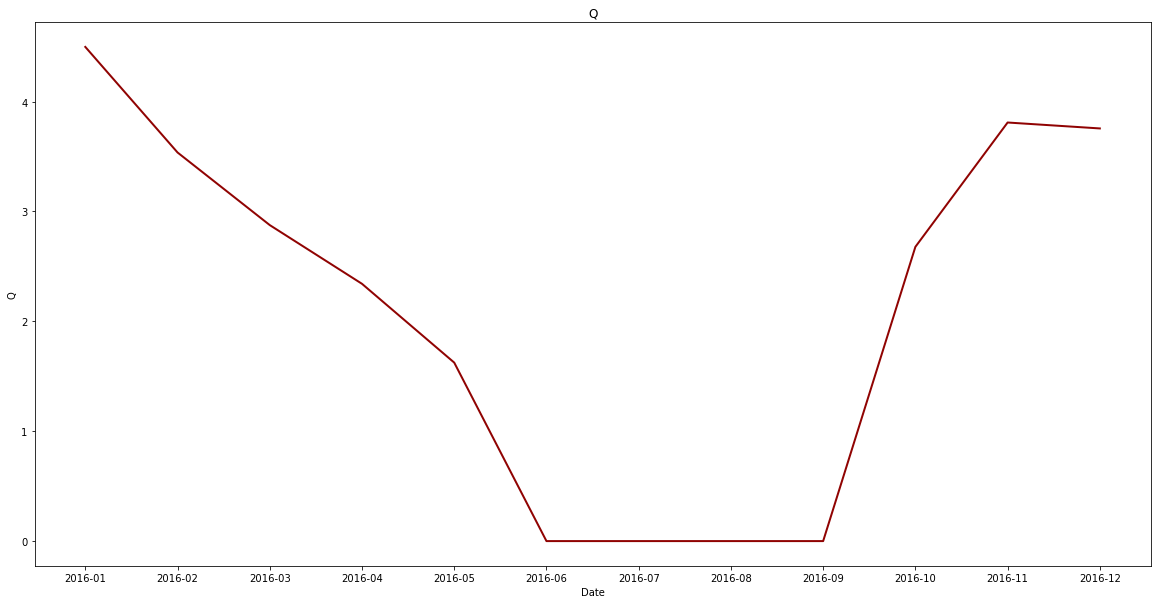

In [88]:
# data_date把日按月聚合resample
data_date.set_index('Date', inplace=True)
data_date.index=pd.to_datetime(data_date.index)
data_date=data_date.resample('M').mean()
data_date.reset_index(inplace=True)
#na填充为0
data_date.fillna(0, inplace=True)
#date保留到月份
data_date['Date']=data_date['Date'].dt.strftime('%Y-%m')
data_date.head(20)
#画折线图
plt.figure(figsize=(20,10))
plt.plot(data_date['Date'],data_date['Q'],label='Q',linewidth=2,color='#900302')
plt.xlabel('Date')
plt.ylabel('Q')
plt.title('Q')
plt.show()

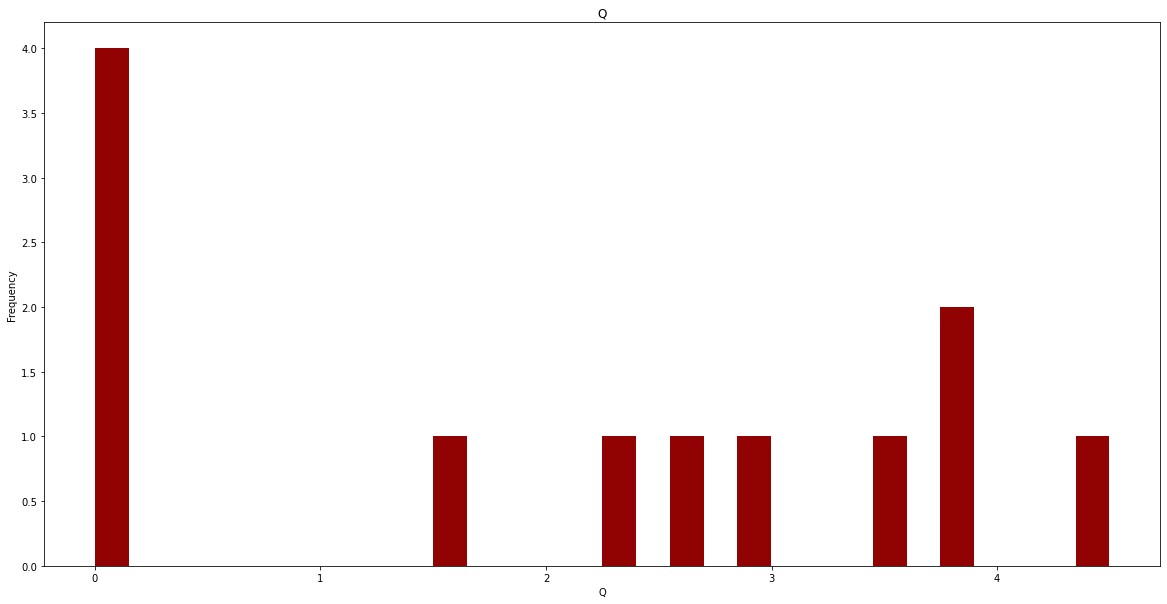

In [89]:
#直方图
plt.figure(figsize=(20,10))
plt.hist(data_date['Q'],bins=30,label='Q',linewidth=2,color='#900302')
plt.xlabel('Q')
plt.ylabel('Frequency')
plt.title('Q')
plt.show()

In [12]:
data_delta_m_Q = data[['delta_m','Q']].groupby(['delta_m']).mean().sort_values(by='delta_m').reset_index()
data_delta_m_Q.rename(columns={'delta_m':'delta_m', 'Q':'Q'}, inplace=True)

data_delta_m_Q = data_delta_m_Q[data_delta_m_Q['delta_m']<200]
data_delta_m_Q.head(20)

,delta_m,Q
0,-25.6,11.710000
1,-25.4,11.920000
2,-24.1,11.160000
3,-23.9,10.800000
4,-23.5,10.830000
5,-23.3,10.830000
6,-23.0,9.440000
7,-22.3,10.120000
8,-22.1,10.756667
9,-22.0,10.300000


In [39]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
 
def plot_trendline(x, y, n):
    pylab.plot(x, y,  color='#900302', marker='.', linestyle='None')
    parameter = np.polyfit(x, y, n) # n=1为一次函数，返回函数参数
    f = np.poly1d(parameter) # 拼接方程
    pylab.plot(x, f(x),"k--")
    plt.show()
    #保存图片

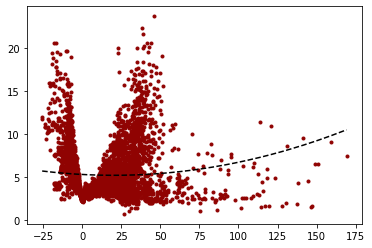

<Figure size 432x288 with 0 Axes>

In [79]:
plot_trendline( data_delta_m_Q['delta_m'], data_delta_m_Q['Q'], 2)
plt.savefig('delta_m_Q.jpg')

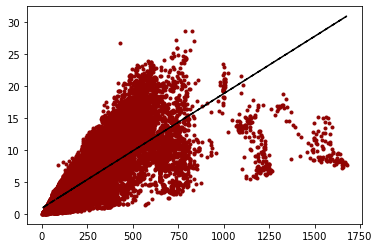

In [56]:
data_m1 = data[['m1','Q']].groupby(['m1']).mean().sort_values(by='m1').reset_index()
plot_trendline( data['m1'], data['Q'], 1)

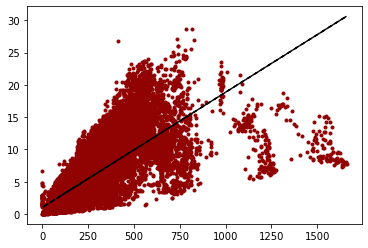

In [57]:
data_m2 = data[['m2','Q']].groupby(['m2']).mean().sort_values(by='m2').reset_index()
plot_trendline( data['m2'], data['Q'], 1)

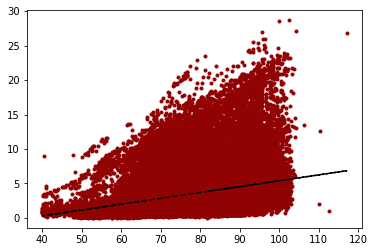

In [43]:
plot_trendline( data['t1'], data['Q'], 1)

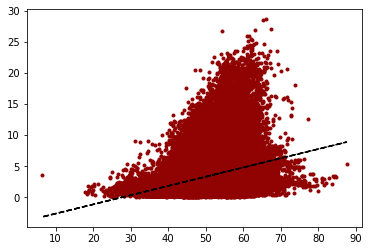

In [44]:
plot_trendline( data['t2'], data['Q'], 1)

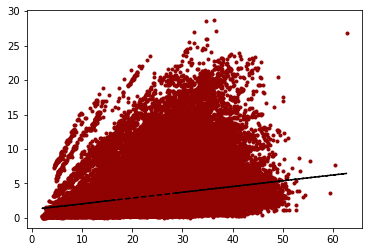

In [45]:
plot_trendline( data['delta_t'], data['Q'], 1)

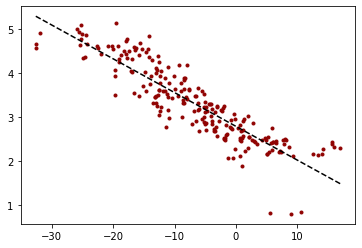

In [46]:

plot_trendline(data_temp_Q['temp'],data_temp_Q['Q'],1)


In [49]:
data_area_of_building = data[['area_of_building','Q']].groupby(['area_of_building']).mean().sort_values(by='area_of_building').reset_index()


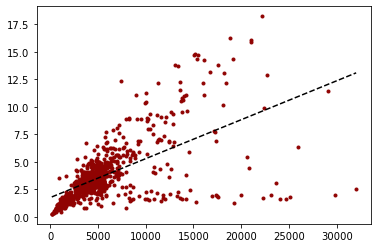

In [51]:
plot_trendline(data_area_of_building['area_of_building'],data_area_of_building['Q'],1)

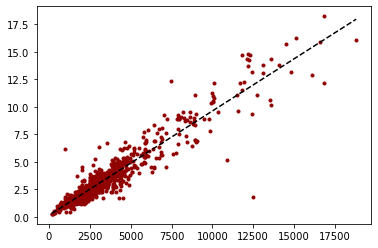

In [54]:
data_area = data[['area','Q']].groupby(['area']).mean().sort_values(by='area').reset_index()
plot_trendline(data_area['area'],data_area['Q'],1)

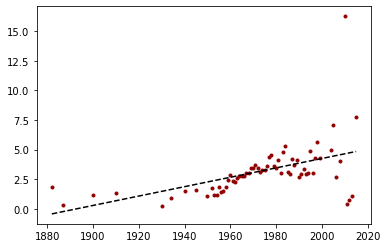

In [55]:
data_year_of_construction = data[['year_of_construction','Q']].groupby(['year_of_construction']).mean().sort_values(by='year_of_construction').reset_index()
plot_trendline(data_year_of_construction['year_of_construction'],data_year_of_construction['Q'],1)

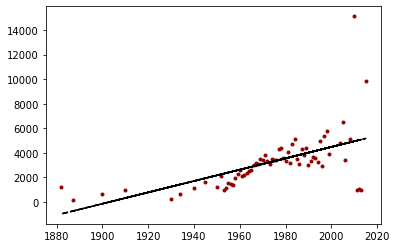

In [65]:
data_year_area = data[['area','year_of_construction']].groupby(['year_of_construction']).mean().sort_values(by='area').reset_index()
plot_trendline(data_year_area['year_of_construction'],data_year_area['area'],1)

Text(0.5, 1.0, 'Q')

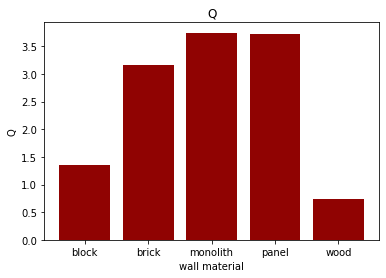

In [68]:
data_walls_material = data[['walls_material','Q']].groupby(['walls_material']).mean().sort_values(by='walls_material').reset_index()
#柱状图
plt.figure(figsize=(6,4))
plt.bar(data_walls_material['walls_material'],data_walls_material['Q'],color='#900302')
plt.xlabel('wall material')
plt.ylabel('Q')
plt.title('Q')


Text(0.5, 1.0, 'Q')

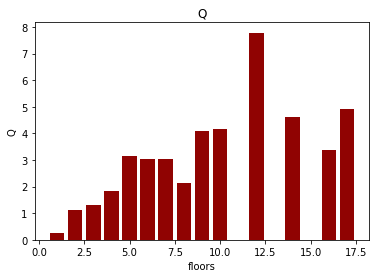

In [71]:
data_floor = data[['floors','Q']].groupby(['floors']).mean().sort_values(by='floors').reset_index()
#柱状图
plt.figure(figsize=(6,4))
plt.bar(data_floor['floors'], data_floor['Q'],color='#900302')
plt.xlabel('floors')
plt.ylabel('Q')
plt.title('Q')

Text(0.5, 1.0, 'Q')

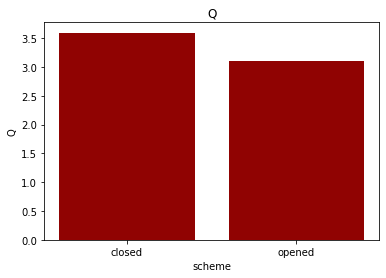

In [74]:
data_scheme = data[['scheme','Q']].groupby(['scheme']).mean().sort_values(by='scheme').reset_index()
#柱状图
plt.figure(figsize=(6,4))
plt.bar(data_scheme['scheme'], data_scheme['Q'],color='#900302')
plt.xlabel('scheme')
plt.ylabel('Q')
plt.title('Q')

Text(0.5, 1.0, 'Q')

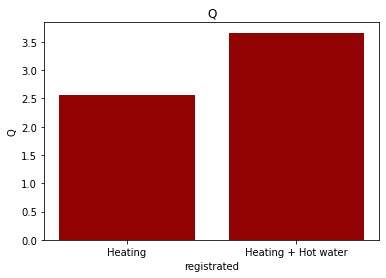

In [77]:
data_registrated = data[['registrated','Q']].groupby(['registrated']).mean().sort_values(by='registrated').reset_index()
#柱状图
plt.figure(figsize=(6,4))
plt.bar(data_registrated['registrated'], data_registrated['Q'],color='#900302')
plt.xlabel('registrated')
plt.ylabel('Q')
plt.title('Q')


In [ ]:
'registrated', 'scheme', 'type', 'floors',


In [18]:
data_date['Date'].unique()

array(['2016/1/1', '2016/1/10', '2016/1/11', '2016/1/12', '2016/1/13',
       '2016/1/14', '2016/1/15', '2016/1/16', '2016/1/17', '2016/1/18',
       '2016/1/19', '2016/1/2', '2016/1/20', '2016/1/21', '2016/1/22',
       '2016/1/23', '2016/1/24', '2016/1/25', '2016/1/26', '2016/1/27',
       '2016/1/28', '2016/1/29', '2016/1/3', '2016/1/30', '2016/1/31',
       '2016/1/4', '2016/1/5', '2016/1/6', '2016/1/7', '2016/1/8',
       '2016/1/9', '2016/10/1', '2016/10/10', '2016/10/11', '2016/10/12',
       '2016/10/13', '2016/10/14', '2016/10/15', '2016/10/16',
       '2016/10/17', '2016/10/18', '2016/10/19', '2016/10/2',
       '2016/10/20', '2016/10/21', '2016/10/22', '2016/10/23',
       '2016/10/24', '2016/10/25', '2016/10/26', '2016/10/27',
       '2016/10/28', '2016/10/29', '2016/10/3', '2016/10/30',
       '2016/10/31', '2016/10/4', '2016/10/5', '2016/10/6', '2016/10/7',
       '2016/10/8', '2016/10/9', '2016/11/1', '2016/11/10', '2016/11/11',
       '2016/11/12', '2016/11/13', '2016/1